# 採択状況の集計事例 基盤C

### 事前準備

In [34]:
import pandas as pd
import numpy as np
import pickle
import configparser
from sqlalchemy import create_engine
from sqlalchemy.types import String, Integer
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

config = configparser.ConfigParser()
config.read('../settings/config.ini')
username = config['mariadb']['username']
password = config['mariadb']['password']
database = config['mariadb']['database']
url = 'mysql+pymysql://' + username + ':' + password + '@localhost:3306/' + database + '?charset=utf8'
engine = create_engine(url)

### ここから本編

データを取得する
- 新規のみ
- 採択年度：2010年度以降
- 研究種目：基盤C (niicode == 72)

In [35]:
sql = '''
SELECT *
FROM grantaward
LEFT OUTER JOIN kaken_master_category USING (category_niicode)
LEFT OUTER JOIN kaken_master_section USING (section_niicode)
LEFT OUTER JOIN kaken_master_institution USING (institution_niicode)
WHERE grantaward.startfiscalyear >= 2009
AND grantaward.category_niicode = 72
'''
df = pd.read_sql_query(sql, engine)

年度ごとの新規採択件数の推移

In [36]:
pivot = pd.crosstab([df['category_name'], df['section_name']], df['startfiscalyear'])
pivot

startfiscalyear             2009  2010  2011  2012   2013   2014   2015  \
category_name section_name                                                
基盤研究(C)       一般            7768  8096  9625  9870  10127  10550  11321   
              特設分野             0     0     0     0      1     30     68   

startfiscalyear              2016   2017   2018  
category_name section_name                       
基盤研究(C)       一般            11732  11983  12175  
              特設分野             82     71      0

年度ごとの新規採択件数の推移を折れ線グラフで表す

Text(0,0.5,'採択件数')

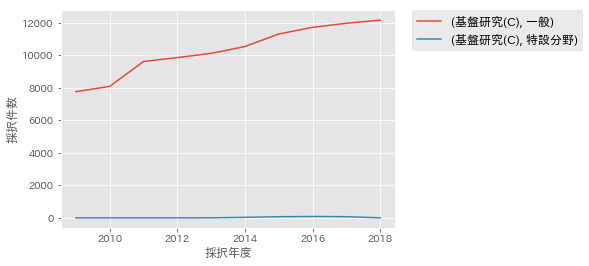

In [37]:
pivot = pivot.T
pivot.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
plt.xlabel("採択年度")
plt.ylabel("採択件数")

基盤C一般の新規採択件数は、過去10年増加傾向が続いていることがわかる。

以下は、一般区分 (section_niicode == 17) のみでみていく

In [38]:
df = df.query('section_niicode == 17')

研究機関別にみてみる。たとえば旧帝大だけにして、2018年度の件数の多い順にソートする

In [39]:
teidaicode = [10101, 11301, 12601, 13901, 14301, 14401, 17102]
teidai = df[df['institution_niicode'].isin(teidaicode)]
pivot = pd.crosstab(teidai['institution_name'], teidai['startfiscalyear'])
pivot = pivot.sort_values(2018, ascending=False)
pivot

startfiscalyear,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
institution_name,,,,,,,,,,
東京大学,184,193,229,236,233,249,287,280,273,344
京都大学,173,186,211,252,212,229,278,281,244,288
大阪大学,196,202,208,258,238,235,256,254,267,282
東北大学,163,167,203,244,231,220,240,256,233,268
九州大学,186,163,213,219,204,225,245,212,219,236
北海道大学,146,147,188,181,188,196,151,183,189,196
名古屋大学,141,137,168,149,170,158,180,183,184,173


(0, 354.35)

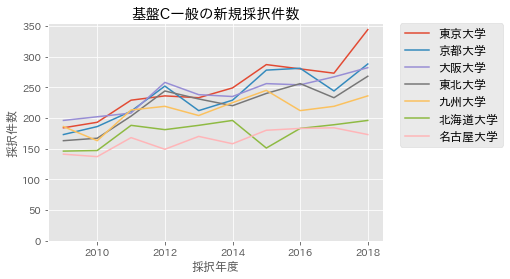

In [40]:
pivot = pd.crosstab(teidai['institution_name'], teidai['startfiscalyear'])
pivot = pivot.sort_values(2018, ascending=False)
pivot = pivot.T
ax = pivot.plot()
ax.set_title('基盤C一般の新規採択件数')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
ax.set_xlabel("採択年度")
ax.set_ylabel("採択件数")
ax.set_ylim(0)

旧帝大全体でみるとはだいたい増えてるけど、北大と名大はボックス圏内にいるっぽい。

旧六大学は？

In [41]:
kyuurokucode = [12501, 13101, 13301, 15301, 17301, 17401]
kyuuroku = df[df['institution_niicode'].isin(kyuurokucode)]
pivot = pd.crosstab(kyuuroku['institution_name'], kyuuroku['startfiscalyear'])
pivot = pivot.sort_values(2018, ascending=False)
pivot

startfiscalyear,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
institution_name,,,,,,,,,,
岡山大学,105,113,122,122,125,132,148,125,150,173
金沢大学,80,94,115,103,109,141,124,134,143,142
千葉大学,102,116,115,114,123,131,138,125,124,119
新潟大学,101,81,127,131,112,133,133,128,138,108
熊本大学,83,73,96,97,100,99,95,115,118,106
長崎大学,82,66,85,93,95,103,110,113,89,100


(0, 178.35)

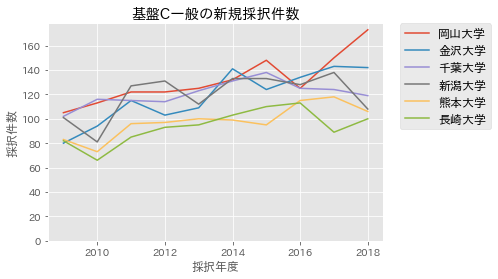

In [29]:
kyuuroku = df[df['institution_niicode'].isin(kyuurokucode)]
pivot = pd.crosstab(kyuuroku['institution_name'], kyuuroku['startfiscalyear'])
pivot = pivot.sort_values(2018, ascending=False)
pivot = pivot.T
ax = pivot.plot()
ax.set_title('基盤C一般の新規採択件数')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
ax.set_xlabel("採択年度")
ax.set_ylabel("採択件数")
ax.set_ylim(0)

岡山が一つとびぬけている。基盤Bなど他の種目も見たり、新規＋継続件数も見たりしないと、意味のあることは言えないけど。